<a href="https://colab.research.google.com/github/Luqui12/Microbes_classification/blob/main/Microbes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Advanced Machine Learning project - Luca Leomazzi**

This Kaggle dataset can be found here : [Microbes Dataset](https://www.kaggle.com/datasets/sayansh001/microbes-dataset)

Novel DNA sequencing technologies have proliferated over the past two decades. Continual improvements in “next-generation sequencing” (NGS) and “third-generation sequencing” (TGS) have increased the fidelity and rate of sequencing, but it still takes hours or days to obtain complete sequences. Furthermore, there are some diagnostic applications in which very rapid identification of a particular gene or genetic species becomes essential, while identification of all genes is not necessary. For example, in patients with septic shock from bacterial infections, identification of antibiotic-resistance genes is essential because the mortality rate increases 7.6% per hour of delay in administering correct antibiotics. Unfortunately, it takes more than 24 h to grow up the bacteria recovered from the blood of an infected patient, identify the species, and then determine to which antibiotics the organism is resistant, leading to a very high mortality rate for such infections.

Bacterial antibiotic resistance is becoming a significant health threat, and rapid identification of antibiotic-resistant bacteria is essential to save lives and reduce the spread of antibiotic resistance.

This dataset constains observable geometrical features (that can be calculated rapidly and in a cost-effective way) of ten different micro-forms of life (Spirogyra, Volvox, Pithophora, Yeast, Raizopus, Penicillum, Aspergillus sp, Protozoa, Diatom, Ulothrix). The aim of this project is to classify this ten different classes.

# Libraries/Data Import

In [ ]:
!pip install keras-tuner -q

     |████████████████████████████████| 135 kB 5.4 MB/s 
     |████████████████████████████████| 1.6 MB 44.5 MB/s 


In [ ]:
#Import General libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import seaborn as sns

#Import libraries for imbalanced learning
from imblearn.combine import SMOTETomek

#Import sklearn ML libraries 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,KFold
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import ConfusionMatrixDisplay,balanced_accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier 
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, matthews_corrcoef, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

# Import Deep Learning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
import xgboost as xgb
import keras_tuner


#Setting numpy seed
np.random.seed(0)

In [ ]:
df = pd.read_csv("https://github.com/Luqui12/Microbes_classification/blob/main/microbes.csv.zip?raw=true", compression="zip", index_col=False)
df=df.iloc[:,1:]
df

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,10.70,15.8,5.43,3.75,0.7850,8.14,2.15,22.3,2.97,10.90,...,2.97,1.340,1.610,0.683,0.1950,3.63,12.10,1.310,7.99,Spirogyra
1,5.60,18.3,4.14,6.16,0.3640,3.51,18.60,22.5,5.41,19.20,...,5.47,1.520,1.520,1.010,0.2150,6.01,20.60,0.765,7.99,Spirogyra
2,8.32,19.8,4.63,6.66,0.4150,5.85,21.00,22.4,5.96,10.20,...,5.96,1.630,1.380,1.110,0.1820,6.55,11.50,0.953,7.99,Spirogyra
3,10.10,17.9,7.29,11.10,1.4700,6.30,9.94,21.9,8.81,10.70,...,8.88,2.040,2.120,0.715,0.3710,10.30,12.00,2.340,7.99,Spirogyra
4,6.27,20.2,20.10,10.70,14.7000,3.97,2.58,11.9,10.20,1.22,...,10.20,7.780,6.210,6.800,4.4400,14.00,9.55,17.600,7.99,Spirogyra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30522,3.01,22.6,4.90,20.00,0.4340,1.40,19.90,22.1,18.10,9.92,...,18.60,4.350,1.350,1.710,0.5490,19.10,13.20,1.070,7.15,Ulothrix
30523,5.19,22.6,2.07,19.40,0.0788,1.67,5.09,22.8,19.20,16.20,...,20.00,1.460,0.411,0.458,0.0597,19.80,17.20,0.197,7.15,Ulothrix
30524,9.21,22.7,2.07,21.00,0.0790,5.81,12.70,22.8,20.10,11.40,...,20.10,1.060,0.257,0.319,0.0341,20.70,11.60,0.198,7.15,Ulothrix
30525,8.21,22.6,1.87,20.50,0.0641,5.96,11.30,22.8,20.20,20.20,...,20.20,1.010,0.285,0.350,0.0314,20.80,20.40,0.162,7.15,Ulothrix


# Data Processing

### Train-Test split, duplicates and resampling

The dataset have 2 main problems:

1. **Duplicated instances** : There's a huge amount of duplicated examples in this dataset that must be removed. Leaving exact copies of an instance in a datset can introduce biases and lead to invalid performance testing (e.g.: if the same instance is present in both the training and test set)
2. **Class imbalance** : As shown in the plot below, some classes are more represented (i.e. "Ulothrix") and some are under represented (i.e. "Penicillum"). In such cases, machine learning classifiers tend to be more biased towards the majority class, causing poor classification performance on the minority class. The F1-weighted score is multi-class metric that takes into account class imbalance. 

Therefore, duplicated instances must be removed and techniques for handling imbalanced dataset should be used.


In [ ]:

# Removing duplicated examples
print("Initial dimension of the dataset is:",df.shape[0],"examples and ",df.shape[1],"features")
df=df.drop_duplicates(ignore_index=True)
print("Dimension of the datset after removing the duplicated data is:",df.shape[0],"examples and ",df.shape[1],"features")


Initial dimension of the dataset is: 30527 examples and  25 features
Dimension of the datset after removing the duplicated data is: 4874 examples and  25 features


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, '# of instances for each class')]

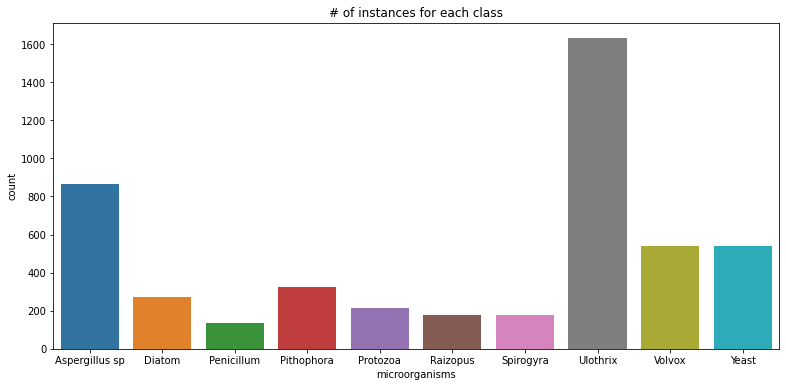

In [ ]:
# Visualizing class imbalance
classes=np.unique(df['microorganisms'])
plt.figure(figsize=(13,6))
sns.countplot(df['microorganisms'], label="count",order=classes).set(title="# of instances for each class")

Since the dataset is quite unbalanced I will use the **SMOTETomek**
 for balancing the training instances. SMOTETomek combines two approaches :

- Oversampling using SMOTE
- Undersampling using Tomek links

Synthetic Minority Oversampling Technique or SMOTE is a technique to oversample the minority class. Simply adding duplicate records of minority class often don’t add any new information to the model. In SMOTE new instances are synthesized from the existing data. SMOTE looks into minority class instances and use k nearest neighbor to select a random nearest neighbor, and a synthetic instance is created randomly in feature space.

Tomek links is an undersampling technique which can be used to find desired samples of data from the majority class that is having the lowest Euclidean distance with the minority class data (i.e. the data from the majority class that is closest with the minority class data, thus make it ambiguous to distinct), and then removing it.



In [ ]:
# Splitting features and labels
X = df.drop(columns="microorganisms")
Y= df.microorganisms

# Transforming non-numeric labels to numeric 
le = preprocessing.LabelEncoder()
le.fit(Y)
Y=le.transform(Y)

# Splitting Train and Test sets 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, random_state=0,test_size=0.2,train_size=0.8)

In [ ]:
examples_before= X_train.shape[0]
# SMOTETomek :  1) Oversampling every class, excluding the majority one   2) Undersampling just the majority class
sm_tl = SMOTETomek(random_state=0)
X_train,Y_train = sm_tl.fit_resample(X_train,Y_train)

# Printing the number of instances for each class after using balancing the dataset
print("The training set had",examples_before,"instances\nAfter performing SMOTETomek, the training set contains",X_train.shape[0],"instances")
for i in range(len(np.unique(Y_train))):
  print("class",i,":", np.unique(Y_train,return_counts=True)[1][i],"instances")


The training set had 3899 instances
After performing SMOTETomek, the training set contains 13084 instances
class 0 : 1299 instances
class 1 : 1306 instances
class 2 : 1317 instances
class 3 : 1314 instances
class 4 : 1314 instances
class 5 : 1317 instances
class 6 : 1310 instances
class 7 : 1285 instances
class 8 : 1307 instances
class 9 : 1315 instances


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, '# of instances for each class')]

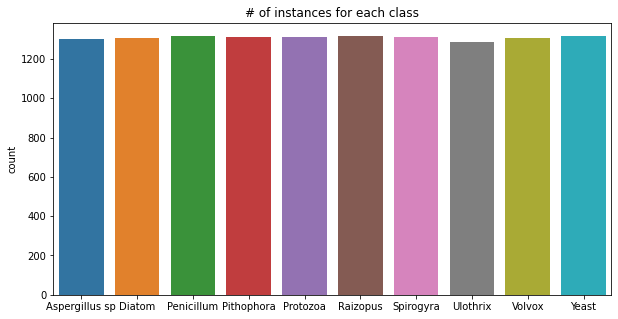

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(le.inverse_transform(Y_train), label="count",order=classes).set(title="# of instances for each class")

### Feature scaling & selection

#### PCA

In principle I could use PCA for dimensionality reduction. After implementing PCA on the dataset, my original features will turn into Principal Components. Principal Components (PCs) are linear combination of my original features. Principal Components are not as readable and interpretable as original features. Since the numer of dimensions of this dataset it's not so high and I didn't observed any perfomance boosting, I decided to keep the original features and just remove the highly correlated one.

In [ ]:
def plot3D_PCA(data,labels):
  scaler = StandardScaler()
  data= scaler.fit_transform(data)
  pca = PCA(n_components=3)
  z=pca.fit_transform(data)
  DR_tab = pd.DataFrame()
  DR_tab["label"] = labels.astype(str)
  DR_tab["comp-1"] = z[:,0]
  DR_tab["comp-2"] = z[:,1]
  DR_tab["comp-3"] = z[:,2]

  plt.figure(figsize=(7,7))
  fig = px.scatter_3d(DR_tab, x='comp-1', y='comp-2', z='comp-3',color='label')
  fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
  print("% of variance explained  by the first 3 PCs:",pca.explained_variance_ratio_)
  return fig

Using just 3 components, PCA doesn't seem to find 3 main PCs that are able to separate the 10 classes

In [ ]:
plot3D_PCA(X_train,Y_train)

% of variance explained  by the first 3 PCs: [0.38167047 0.27022057 0.08848465]


<Figure size 504x504 with 0 Axes>

Checking how many components are needed for explaining 95% of the datset variability

In [ ]:
  pca95 = PCA(n_components=0.95)
  reduced = pca95.fit_transform(X_train)
  print("Number of PCs needed to explain 95% of the dataset variability : ",reduced.shape[1])

Number of PCs needed to explain 95% of the dataset variability :  5


#### Removing Higly correlated features

Using this approach I'll search and remove highly correlated features.
Highly correlated features will not bring additional information (or just very few), however they will increase the complexity of the algorithm, thus increasing the risk of errors.

In [ ]:
# Defining a function for plotting the correlation matrix and another one for removing the highly correlated features 
def corr_plot(data):
  plt.figure(figsize = (17,10))
  sns.heatmap(df.corr(), center=0, annot=True)
  plt.title('Correlation plot')
  return plt.show()

def rm_corr_features(data,test_data):
  print("Initial number of features :",data.shape[1])
  corr_matrix=data.corr().abs()
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
  to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
  data=data.drop(labels=to_drop,axis=1)
  print("The following features were removed since highly correlated (>0.95) to another one in the datatset: "," ".join(to_drop))
  print("Current number of features",data.shape[1])
  return data

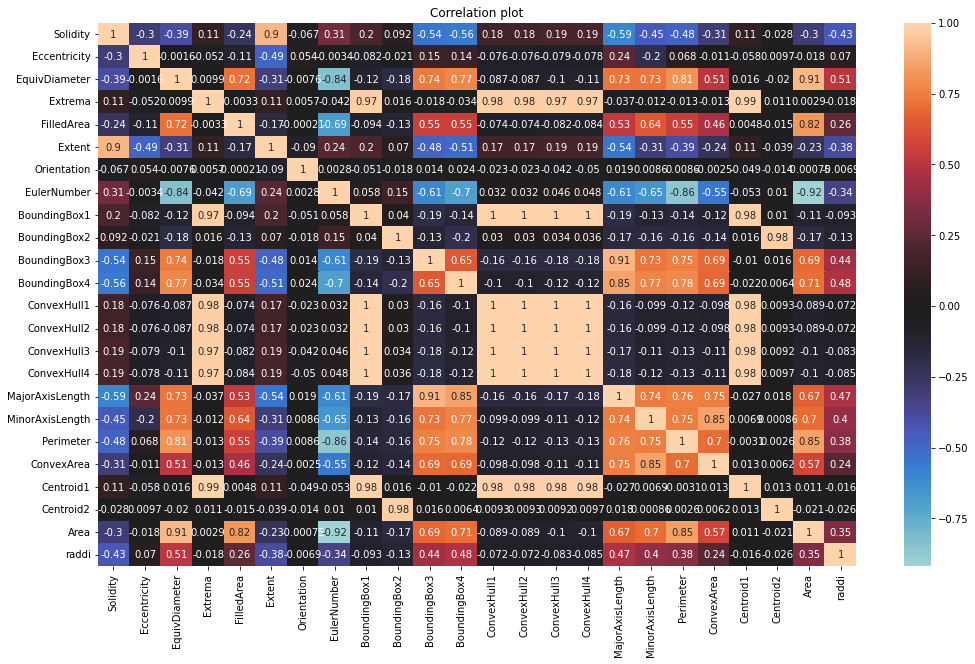

In [ ]:
corr_plot(X_train)

In [ ]:
X_train=rm_corr_features(X_train,X_test)

Initial number of features : 24
The following features were removed since highly correlated (>0.95) to another one in the datatset:  BoundingBox1 ConvexHull1 ConvexHull2 ConvexHull3 ConvexHull4 Centroid1 Centroid2
Current number of features 17


In [ ]:
#Removing Features also in the test set
features=X_train.columns
X_test=X_test[features]

Then I scale the features



In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models for classification

The problem I'm facing is a multi-class classification model with an imbalanced test set. For this reason, besides the **accuracy**, I will use the following metrics to evaluate the methods:
- **F1 weighted score** : F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The "F1 weighted" metric is slightly modified to take into account the class imbalance
- **Matthews Correlation Coefficient** : The Matthews correlation coefficient is used in machine learning as a measure of the quality of binary and multiclass classifications. It takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes. The MCC is in essence a correlation coefficient value between -1 and +1. A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction

Models will be evaluate in a k-fold cross validation and hyperparameter tunining will be performed using a grid search or a randomized search depending on the computational time needed to train the model


In [ ]:
# Defining a function to return metrics + Confusion Matrix
def test_performance(estimator,test_set=X_test_scaled):
  '''Evaluate metrics on the test set and return the confusion matrix'''
  cf=ConfusionMatrixDisplay.from_estimator(estimator,test_set,Y_test,)
  Y_pred=estimator.predict(test_set)
  acc=accuracy_score(Y_test,Y_pred)
  F1=f1_score(Y_test,Y_pred,average="weighted")
  MCC= matthews_corrcoef(Y_test,Y_pred)
  print("Accuracy score :",round(acc,2))
  print("F1-weighted score :",round(F1,2))
  print("Matthews Correlation Coefficient :",round(MCC,2),"\n")
  return cf

## Baseline Metrics

Baseline metrics for this problem will be calculated using a ```DummyClassifier```, which makes predictions that ignore the input features. In this case I will use a classifier that always outputs the most frequent class (before dataset rebalancing), so the "Ulothrix" class.




In [ ]:
d_clf= DummyClassifier(strategy="constant",constant=7).fit(X_train,Y_train)

Accuracy score : 0.32
F1-weighted score : 0.16
Matthews Correlation Coefficient : 0.0 



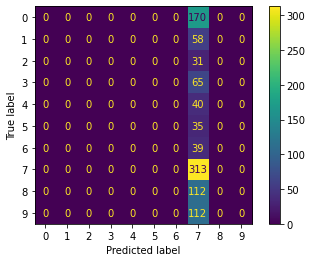

In [ ]:
test_performance(d_clf,test_set=X_test)

Any model that shows improvement in respect to this baseline metrics will be considered meaningful

## SVM

An SVM model can use different kernels. Here I'm implementing 2 different kernels : linear and radial basis function. The latter it's better suited to deal with nonlinearity, and usually leads to higher perfomances but also higher training times.

Here I'm optimizing the C hyperparameter which adds a penalty for each misclassified data point. If c is small, the penalty for misclassified points is low, so a decision boundary with a large margin is chosen at the expense of a greater number of misclassifications in the training set (soft margin classification)

Note: according to [sklearn LinearSVC documentation](hhttps://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) I set  ```dual=False``` since: n_samples > n_features



In [ ]:
# Hyperparameter to tune

params={'C':[1e-4,1e-3,1e-2,1e-1,1,10,100]}  

In [ ]:
%%time
svm_lin = GridSearchCV(estimator=LinearSVC(random_state=0,dual=False),param_grid=params,scoring='f1_weighted',cv=3)
svm_lin.fit(X_train_scaled,Y_train)
print("Best parameters :",svm_lin.best_params_)
print("Mean cross-validated score of the best estimator :",svm_lin.best_score_)

Best parameters : {'C': 100}
Mean cross-validated score of the best estimator : 0.45518370272048364
CPU times: user 10.5 s, sys: 899 ms, total: 11.4 s
Wall time: 15.9 s


In [ ]:
%%time
svm_rbf = GridSearchCV(estimator=SVC(random_state=0,kernel='rbf'),param_grid=params,scoring='f1_weighted',cv=3)
svm_rbf.fit(X_train_scaled,Y_train)
print("Best parameters :",svm_rbf.best_params_)
print("Mean cross-validated score of the best estimator :",svm_rbf.best_score_)

Best parameters : {'C': 100}
Mean cross-validated score of the best estimator : 0.8624845763694089
CPU times: user 3min 13s, sys: 430 ms, total: 3min 13s
Wall time: 3min 19s


Accuracy score : 0.32
F1-weighted score : 0.3
Matthews Correlation Coefficient : 0.26 



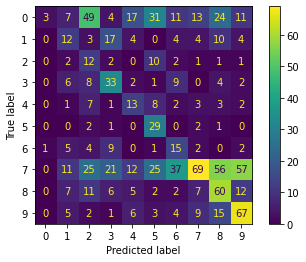

In [ ]:
test_performance(svm_lin)

Accuracy score : 0.5
F1-weighted score : 0.51
Matthews Correlation Coefficient : 0.41 



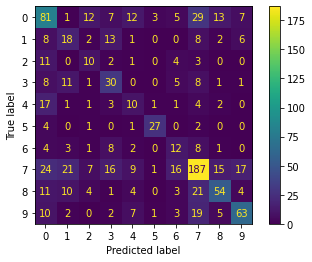

In [ ]:
test_performance(svm_rbf)

As mentioned before, we can observe that both performance and training time for radial basis function kernel type is higher 

## Ensemble Learning 

Ensemble learning is a widely-used and preferred machine learning technique in which multiple individual models, often called base models, are combined to produce an effective optimal prediction model.

### Bagging

Bagging involves the building multiple models (typically of the same type) from different subsamples of the training dataset

#### Random Forest

A Random Forest model combines the output of multiple decision trees to reach a single result. 
The hyperparamters optimized here are:
- Number of estimators
- Minimum number of samples required to split an internal node
- The number of features to consider when looking for the best split

In [ ]:
parameters={
    'n_estimators':list(range(100,2000,200)),
    'min_samples_split': list(range(2,50)),
    'max_features':["sqrt","log2",None]
}

In [ ]:
%%time
rf = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=0,n_jobs=-1),param_distributions=parameters,cv=3,scoring='f1_weighted',n_iter=20)
rf.fit(X_train,Y_train)
print("Best parameters :",rf.best_params_)
print("Mean cross-validated score of the best estimator :",rf.best_score_)

Best parameters : {'n_estimators': 1300, 'min_samples_split': 2, 'max_features': None}
Mean cross-validated score of the best estimator : 0.8335711598258079
CPU times: user 13min 50s, sys: 39.6 s, total: 14min 30s
Wall time: 1h 20min 37s


Accuracy score : 0.54
F1-weighted score : 0.55
Matthews Correlation Coefficient : 0.46 



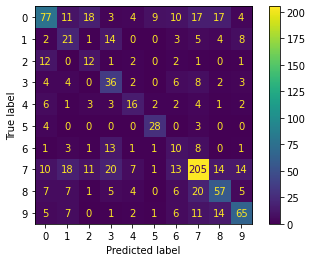

In [ ]:
test_performance(rf,test_set=X_test)

##### Visualizing feature importances using a random forest model

Random forests can be useful for visulizing the impurity-based feature importances.The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature (in this case the 'Gini index')

[Text(0.5, 1.0, 'Feature Importance from Random Forest model')]

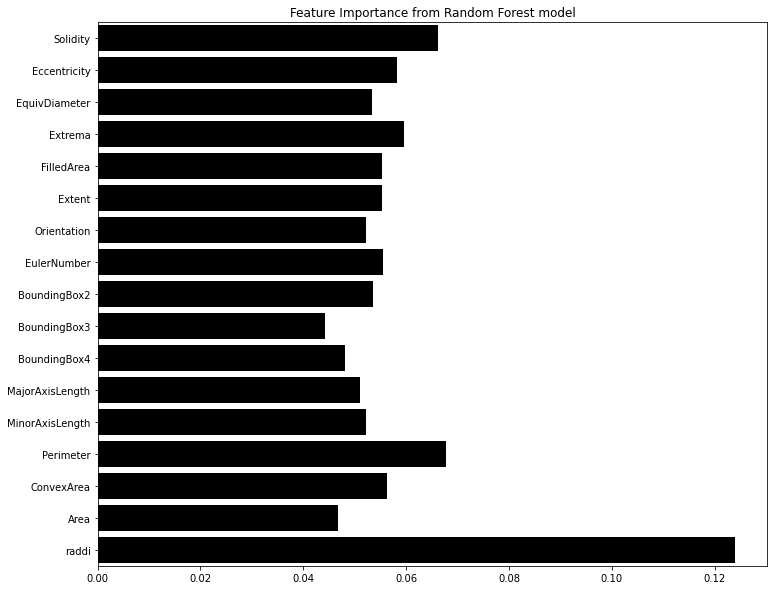

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(y=features,x=rf.best_estimator_.feature_importances_,color="black").set(title="Feature Importance from Random Forest model")

#### ExtraTrees

Extra Trees (Extremely Randomized Trees) is very similar to Random Forest. It uses a random selection of split values when splitting a node (and not the optimum split as in the Random Forests)

In [ ]:
%%time
et = RandomizedSearchCV(estimator=ExtraTreesClassifier(random_state=0,n_jobs=-1),param_distributions=parameters,cv=3,scoring='f1_weighted',n_iter=20)
et.fit(X_train,Y_train)
print("Best parameters :",et.best_params_)
print("Mean cross-validated score of the best estimator :",et.best_score_)



Best parameters : {'n_estimators': 500, 'min_samples_split': 4, 'max_features': None}
Mean cross-validated score of the best estimator : 0.8738267614383441
CPU times: user 4min 4s, sys: 21.9 s, total: 4min 26s
Wall time: 11min 40s


Accuracy score : 0.56
F1-weighted score : 0.57
Matthews Correlation Coefficient : 0.48 



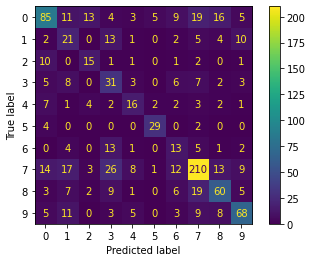

In [ ]:
test_performance(et,test_set=X_test)

### Boosting

Boosting algorithms seek to improve the prediction power by training a sequence of weak models, each compensating the weaknesses of its predecessors. Here I will try to build boosting models based on the most popular algorithms: AdaBoost and XGBoost.

#### AdaBoost

In [ ]:
parameters ={
    'n_estimators': np.arange(100,2001,100),
    'learning_rate': [1e-3,1e-2,1e-1,1,2,10],
    'base_estimator':[DecisionTreeClassifier(max_depth=i) for i in range(1,11) ]
}

In [ ]:
%%time
adb = RandomizedSearchCV(AdaBoostClassifier(random_state=0),param_distributions=parameters,cv=3,scoring='f1_weighted',n_iter=15)
adb.fit(X_train,Y_train)
print("Best parameters :",adb.best_params_)
print("Mean cross-validated score of the best estimator :",adb.best_score_)

Best parameters : {'n_estimators': 1000, 'learning_rate': 2, 'base_estimator': DecisionTreeClassifier(max_depth=10)}
Mean cross-validated score of the best estimator : 0.8777143932860363
CPU times: user 51min 57s, sys: 6.34 s, total: 52min 3s
Wall time: 52min 19s


Accuracy score : 0.57
F1-weighted score : 0.57
Matthews Correlation Coefficient : 0.47 



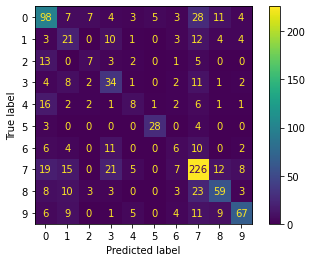

In [ ]:
test_performance(adb,test_set=X_test)

#### Xgboost

In [ ]:
parameters={'n_estimators': np.arange(100,2001,100),
            'max_depth': np.arange(1,10),
           'learning_rate': [1e-3,1e-2,1e-1,1,2,10]         
}


In [ ]:
%%time
XGB_clf=RandomizedSearchCV(xgb.XGBClassifier(seed = 0),param_distributions=parameters,cv=3,scoring='f1_weighted',n_iter=15)
XGB_clf.fit(X_train,Y_train)
print("Best parameters :",XGB_clf.best_params_)
print("Mean cross-validated score of the best estimator :",XGB_clf.best_score_)

Best parameters : {'n_estimators': 1600, 'max_depth': 9, 'learning_rate': 0.1}
Mean cross-validated score of the best estimator : 0.8810821507739276
CPU times: user 1h 21min 19s, sys: 6.78 s, total: 1h 21min 25s
Wall time: 1h 21min 21s


Accuracy score : 0.63
F1-weighted score : 0.63
Matthews Correlation Coefficient : 0.55 



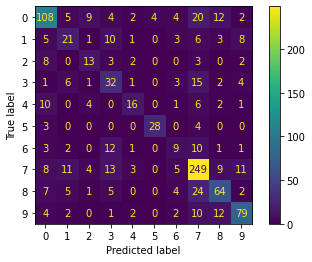

In [ ]:
test_performance(XGB_clf,test_set=X_test)

### Voting

In this example I'm going to build a voting classifier using the 3 best models we've seen so far

In [ ]:
models=[]

adb= AdaBoostClassifier(random_state=0,n_estimators= 1000,learning_rate= 2, base_estimator= DecisionTreeClassifier(max_depth=10))
models.append(("AdaBoost",adb))
et= ExtraTreesClassifier(random_state=0,n_jobs=-1, n_estimators= 500, min_samples_split= 4,max_features= None)
models.append(("EXTRA TREES",et))
XGB_clf= xgb.XGBClassifier(seed = 0,n_estimators= 1600, max_depth= 9, learning_rate= 0.1)
models.append(("GRADIENT BOOSTING",XGB_clf))


 I will use a "soft" voting classifier, which classifies data based on the probabilities and the weights associated with each classifier in the ensemble

In [ ]:
voting_clf = VotingClassifier(models, voting='soft').fit(X_train,Y_train)

Accuracy score : 0.62
F1-weighted score : 0.62
Matthews Correlation Coefficient : 0.54 



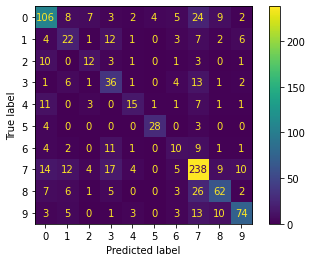

In [ ]:
test_performance(voting_clf,test_set=X_test)

The voting classifier didn't show any improvement in respect to the best classifier in the ensemble (XGBoost classifier). One reason for that is that I'm combining classifiers with too much perfomance difference. Indeed, it is suggested to use classifiers with very similar perfomance and to not combine a relatively "bad" classifier with a "good" one. 

## Neural Networks

In [ ]:
# Defining a function to return metrics + Confusion Matrix for NNs
def test_performance(estimator,test_set=X_test_scaled):
  '''Evaluate metrics on the test set and return the confusion matrix'''
  Y_pred=np.argmax(estimator.predict(test_set),axis=1)
  cf=ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred)
  acc=accuracy_score(Y_test,Y_pred)
  F1=f1_score(Y_test,Y_pred,average="weighted")
  MCC= matthews_corrcoef(Y_test,Y_pred)
  print("Accuracy score :",round(acc,2))
  print("F1-weighted score :",round(F1,2))
  print("Matthews Correlation Coefficient :",round(MCC,2),"\n")
  return cf

### MLP ( Multi Layer Perceptron)

#### MLP with 1 hidden layer

The simplest approach is to try with just one hidden layer.

Using 17 features and 170 neurons hidden layer + 10 neurons (output_layer),we expect:
- 17*170 weights + 170 thresholds = 3060 paramters in the 1st layer
- 170*10 weights +10 thresholds = 1710 parameters in the second layer 
- for a total of 3060+17100=4770 trainable parameters

This information can be reported by ```.summary()```





In [ ]:
nn_clf = keras.Sequential()
nn_clf.add(layers.Dense(170,activation="relu",input_shape=(17,),name="layer_1"))
nn_clf.add(layers.Dense(10,activation="softmax",name="output_layer"))

nn_clf.summary()  

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 170)               3060      
                                                                 
 output_layer (Dense)        (None, 10)                1710      
                                                                 
Total params: 4,770
Trainable params: 4,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nn_clf.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

Why did I use "sparse categorical crossentropy?"

<details>
  
Both, categorical cross entropy and sparse categorical cross entropy have the same loss function which you have mentioned above. The only difference is the encoding of the targets.

If the targets are one-hot encoded, I can use categorical_crossentropy. Examples (for a 3-class classification): [1,0,0] , [0,1,0], [0,0,1]

If the targets are integers, like my dataset, I have to use sparse_categorical_crossentropy. Examples (for a 3-class classification): [1] , [2], [3]

One advantage of using sparse categorical cross entropy is it saves time in memory as well as computation because it simply uses a single integer for a class, rather than a whole vector.
</details>

Why did I use "adam" optimizer?
<details>

The Adam algorithm is again suggested as the default optimization method for deep learning applications

</details>

In [ ]:
early_stopping=EarlyStopping(monitor="val_loss",mode="min",min_delta=0.05,patience=100,restore_best_weights=True,verbose=1)

With early stopping we stop the training if there's no singificant improvement (i.e: *Δvalidation loss < 0.05*) after 100 iterations (*=patience*), this can help to prevent overfitting and reduces training time


In [ ]:
# I will fit using 80% of the training set and validate using 20% 
nn_clf.fit(x=X_train_scaled,
           y=Y_train,
           epochs=1000,
           validation_split=0.20,
           batch_size=200,
           verbose=1,
           callbacks=[early_stopping]
           )

Epoch 1/1000
53/53 [==============================] - 1s 6ms/step - loss: 2.0507 - accuracy: 0.2732 - val_loss: 2.5981 - val_accuracy: 0.0218
Epoch 2/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.7684 - accuracy: 0.3954 - val_loss: 2.4360 - val_accuracy: 0.0795
Epoch 3/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.6434 - accuracy: 0.4329 - val_loss: 2.3047 - val_accuracy: 0.1303
Epoch 4/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.5607 - accuracy: 0.4602 - val_loss: 2.2296 - val_accuracy: 0.1697
Epoch 5/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.5002 - accuracy: 0.4788 - val_loss: 2.1386 - val_accuracy: 0.2098
Epoch 6/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.4535 - accuracy: 0.4869 - val_loss: 2.1216 - val_accuracy: 0.2312
Epoch 7/1000
53/53 [==============================] - 0s 3ms/step - loss: 1.4143 - accuracy: 0.5011 - val_loss: 2.0615 - val_accuracy: 0.2533
Epoch 

Text(0, 0.5, 'Loss')

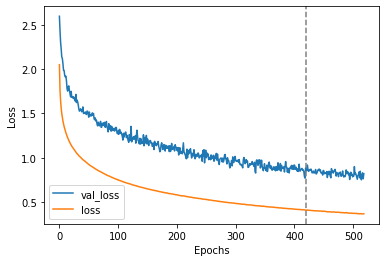

In [ ]:
pd.DataFrame(nn_clf.history.history)[["val_loss","loss"]].plot()
plt.axvline(419,color="grey",linestyle="--")
plt.xlabel("Epochs")
plt.ylabel("Loss")

We can see that after 419 epochs (dashed vertical line) there's no signifcant improvement in the validation loss after 100 iterations, so the training has stopped

Accuracy score : 0.51
F1-weighted score : 0.52
Matthews Correlation Coefficient : 0.42 



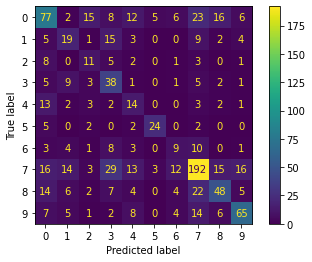

In [ ]:
test_performance(nn_clf)

#### MLP with more hidden layers and Batch normalization

Using just one hidden layer is clearly not enough. Here I will try to implement a MLP with more hidden layers. Hyperparameter optimization performed using ```KerasTuner``` library using early stopping and 20 trials of Random Search around the following hyperparamters:

- number of layers 
- number of neurons in each hidden layer
- activation function of the layers

A Batch Normalization layer is added after each Dense layer

In [ ]:
hp = keras_tuner.HyperParameters()

# Creating an Hypermodel function (a function that takes hyperparameters and returns a Model instance)
def create_model(hp):
  max_size=300
  min_size=200

  model=keras.Sequential()
  for i in range(1,hp.Int("#_of_layers",min_value=2,max_value=6,step=1)):
    model.add(
        layers.Dense(
            hp.Int("layer"+str(i), min_value=min_size, max_value=max_size, step=int(min_size/4)),
            hp.Choice("act"+str(i),['relu','sigmoid'])
              )
    )
    model.add(layers.BatchNormalization())
    max_size=min_size
    min_size=int(min_size/1.5)

  model.add(layers.Dense(10,activation="softmax"))
  model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=["accuracy"])

  return model

In [ ]:
TUNER= keras_tuner.RandomSearch(
    hypermodel=create_model,
    objective=["val_loss"],
    max_trials=15,
    executions_per_trial=1)

In [ ]:
early_stopping=EarlyStopping(monitor="val_loss",mode="min",min_delta=0.03,patience=30,restore_best_weights=True,verbose=1)
TUNER.search(X_train_scaled, Y_train, epochs=300,callbacks=[early_stopping],validation_split=0.2)

Trial 15 Complete [00h 02m 31s]
multi_objective: 0.1965390294790268

Best multi_objective So Far: 0.1965390294790268
Total elapsed time: 00h 43m 37s


In [ ]:
# Reporting the results of each trial
TUNER.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
#_of_layers: 4
layer1: 250
act1: relu
layer2: 166
act2: sigmoid
layer3: 110
act3: relu
layer4: 72
act4: sigmoid
layer5: 47
act5: sigmoid
Score: 0.1965390294790268
Trial summary
Hyperparameters:
#_of_layers: 5
layer1: 300
act1: relu
layer2: 133
act2: relu
layer3: 110
act3: sigmoid
layer4: 86
act4: relu
layer5: 38
act5: relu
Score: 0.21937112510204315
Trial summary
Hyperparameters:
#_of_layers: 3
layer1: 300
act1: relu
layer2: 199
act2: sigmoid
layer3: 132
act3: sigmoid
layer4: 72
act4: sigmoid
layer5: 38
act5: sigmoid
Score: 0.2238791435956955
Trial summary
Hyperparameters:
#_of_layers: 5
layer1: 250
act1: relu
layer2: 166
act2: sigmoid
layer3: 132
act3: sigmoid
layer4: 72
act4: relu
layer5: 38
act5: relu
Score: 0.2284274697303772
Trial summary
Hyperparameters:
#_of_layers: 4
layer1: 200
act1: relu
layer2: 199
act2: relu
layer3: 88
act3: relu
Score: 0.2308827042579651
Trial summary
Hyperp

In [ ]:
nn_clf2=TUNER.get_best_models()[0]

Accuracy score : 0.54
F1-weighted score : 0.54
Matthews Correlation Coefficient : 0.44 



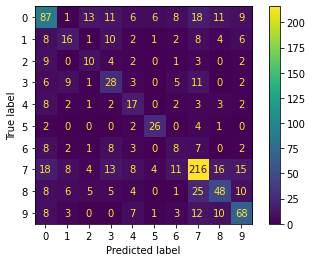

In [ ]:
test_performance(nn_clf2)

#### MLP with Polynomial Features and Dropout

In this attempt I will try to increase the nonlinearity of the model by generating new features using  ```PolynomialFeatures``` which generates new features consisting of all polynomial combinations of the features with degree less than or equal to the specified degree (in this case 2). Thus with this approach, I'm trying to increase the dimesionality instead of reducing it. By generating polynomial features, we can uncover potential new relationships between the features and the target and improve the model's performance. 
I'm also including Dropout between layers : dropout is a regularization method in which some number of layer outputs are randomly ignored during training. Dropout forces nodes within a layer to probabilistically assume a higher or lower responsibility for inputs, usually reducing overfitting and improving generalization error

In [ ]:
plft = PolynomialFeatures(degree=2)
X_train_pf=plft.fit_transform(X_train)
X_test_pf=plft.transform(X_test)

scaler = StandardScaler()
X_train_pfscaled = scaler.fit_transform(X_train_pf)
X_test_pfscaled = scaler.transform(X_test_pf)

In [ ]:
n_features=X_train_pfscaled.shape[1]
print("# of feature after polinomial features generation: ", n_features)

# of feature after polinomial features generation:  171


In [ ]:
# Setting an arbitrary MLP architecture. NOTE: The architecture of the network was selected arbitrarily due to running time issues. 

i=180
nn_poly=keras.Sequential()
nn_poly.add(layers.Dense(250,input_shape=(n_features,),activation="relu"))
nn_poly.add(layers.Dropout(0.2))
for hl in range(1,4):
  nn_poly.add(layers.Dense(i,activation="relu"))
  nn_poly.add(layers.Dropout(0.2))
  nn_poly.add(layers.BatchNormalization())
  i=i/2
nn_poly.add(layers.Dense(10,activation="softmax"))

In [ ]:
nn_poly.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
nn_poly.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 250)               43000     
                                                                 
 dropout_7 (Dropout)         (None, 250)               0         
                                                                 
 dense_15 (Dense)            (None, 180)               45180     
                                                                 
 dropout_8 (Dropout)         (None, 180)               0         
                                                                 
 batch_normalization_9 (Batc  (None, 180)              720       
 hNormalization)                                                 
                                                                 
 dense_16 (Dense)            (None, 90)                16290     
                                                      

In [ ]:
early_stopping=EarlyStopping(monitor="val_loss",mode="min",min_delta=0.02,patience=50,restore_best_weights=True,verbose=1)

In [ ]:
nn_poly.fit(x=X_train_pfscaled,
           y=Y_train,
           epochs=400,
           validation_split=0.20,
           batch_size=100,
           verbose=1,
           callbacks=[early_stopping])

Epoch 1/400
105/105 [==============================] - 1s 13ms/step - loss: 0.6643 - accuracy: 0.7763 - val_loss: 1.0323 - val_accuracy: 0.6290
Epoch 2/400
105/105 [==============================] - 1s 12ms/step - loss: 0.6353 - accuracy: 0.7919 - val_loss: 0.9316 - val_accuracy: 0.6897
Epoch 3/400
105/105 [==============================] - 1s 12ms/step - loss: 0.6465 - accuracy: 0.7848 - val_loss: 0.9419 - val_accuracy: 0.6668
Epoch 4/400
105/105 [==============================] - 1s 12ms/step - loss: 0.6241 - accuracy: 0.7911 - val_loss: 0.8931 - val_accuracy: 0.6997
Epoch 5/400
105/105 [==============================] - 1s 11ms/step - loss: 0.6121 - accuracy: 0.7940 - val_loss: 1.0574 - val_accuracy: 0.6186
Epoch 6/400
105/105 [==============================] - 1s 12ms/step - loss: 0.6044 - accuracy: 0.7976 - val_loss: 0.9798 - val_accuracy: 0.6607
Epoch 7/400
105/105 [==============================] - 1s 13ms/step - loss: 0.5959 - accuracy: 0.7981 - val_loss: 0.9306 - val_accuracy:

Accuracy score : 0.59
F1-weighted score : 0.59
Matthews Correlation Coefficient : 0.5 



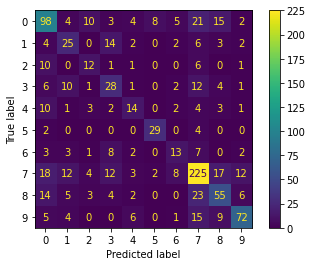

In [ ]:
test_performance(nn_poly,X_test_pfscaled)

### CNN (Convolutional Neural Network)

Inspired by [this article](https://medium.com/spikelab/convolutional-neural-networks-on-tabular-datasets-part-1-4abdd67795b6), in this last attempt I'm going to build a Convolutional Neural Network. In a recent Kaggle competition based on a tabular dataset (like this one) a CNN using a initial Dense layer followed by 1D convolutional and pooling layers was among the top-performing architectures.

In [ ]:
  cnn= keras.Sequential()
  cnn= keras.Sequential()
  cnn.add(layers.Dense(400, input_shape=(17,)))
  cnn.add(layers.Reshape((20,20)))
  cnn.add(layers.Conv1D(filters=48,kernel_size=3,strides=1,padding="same"))
  cnn.add(layers.AveragePooling1D(4,strides=1))
  cnn.add(layers.Conv1D(filters=64,kernel_size=2,strides=1,padding="same"))
  cnn.add(layers.MaxPooling1D(4,strides=2))
  cnn.add(layers.Flatten())
  cnn.add(layers.Dense(80))
  cnn.add(layers.Dense(10,activation="softmax"))

  cnn.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
early_stopping=EarlyStopping(monitor="val_loss",mode="min",min_delta=0.03,patience=50,restore_best_weights=True,verbose=1)
cnn.fit(
    X_train_scaled,Y_train,
        epochs=400,
        validation_split=0.20,
        batch_size=200,
        callbacks=[early_stopping]
)

Epoch 1/400
53/53 [==============================] - 5s 76ms/step - loss: 1.8250 - accuracy: 0.3494 - val_loss: 2.3361 - val_accuracy: 0.1120
Epoch 2/400
53/53 [==============================] - 3s 59ms/step - loss: 1.5137 - accuracy: 0.4655 - val_loss: 2.0591 - val_accuracy: 0.2591
Epoch 3/400
53/53 [==============================] - 2s 44ms/step - loss: 1.3853 - accuracy: 0.5106 - val_loss: 1.9265 - val_accuracy: 0.3099
Epoch 4/400
53/53 [==============================] - 2s 46ms/step - loss: 1.3146 - accuracy: 0.5359 - val_loss: 1.9452 - val_accuracy: 0.3122
Epoch 5/400
53/53 [==============================] - 2s 40ms/step - loss: 1.2615 - accuracy: 0.5554 - val_loss: 1.8702 - val_accuracy: 0.3500
Epoch 6/400
53/53 [==============================] - 2s 35ms/step - loss: 1.2087 - accuracy: 0.5768 - val_loss: 1.8488 - val_accuracy: 0.3523
Epoch 7/400
53/53 [==============================] - 2s 35ms/step - loss: 1.1816 - accuracy: 0.5837 - val_loss: 1.7161 - val_accuracy: 0.3905
Epoch 

31/31 [==============================] - 0s 4ms/step
Accuracy score : 0.53
F1-weighted score : 0.53
Matthews Correlation Coefficient : 0.43 



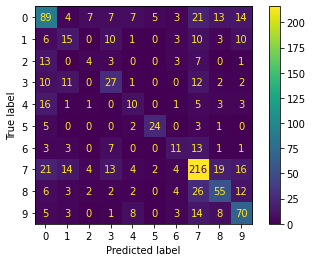

In [ ]:
test_performance(cnn)

#### Visualizing the CNN using Net2Vis

This image, representing the architecture of the previous CNN model was generated on [Net2Vis](https://viscom.net2vis.uni-ulm.de/eheP6EOeZBuT78mt0uzB5zU8wgppuEfDjZ5MOxwgT1WpPRwqVv) using the following code:

In [ ]:

# import keras 
# from keras import models
# from keras import layers
# from keras import utils
# def get_model():
#  cnn= keras.Sequential()
#  cnn.add(layers.Dense(400, input_shape=(17,)))
#  cnn.add(layers.Reshape((20,20)))
#  cnn.add(layers.Conv1D(filters=48,kernel_size=3,strides=1,padding="same"))
#  cnn.add(layers.AveragePooling1D(4,strides=1))
#  cnn.add(layers.Conv1D(filters=64,kernel_size=2,strides=1,padding="same"))
#  cnn.add(layers.MaxPooling1D(4,strides=2))
#  cnn.add(layers.Flatten())
#  cnn.add(layers.Dense(80))
#  cnn.add(layers.Dense(10,activation="softmax"))
#  return cnn

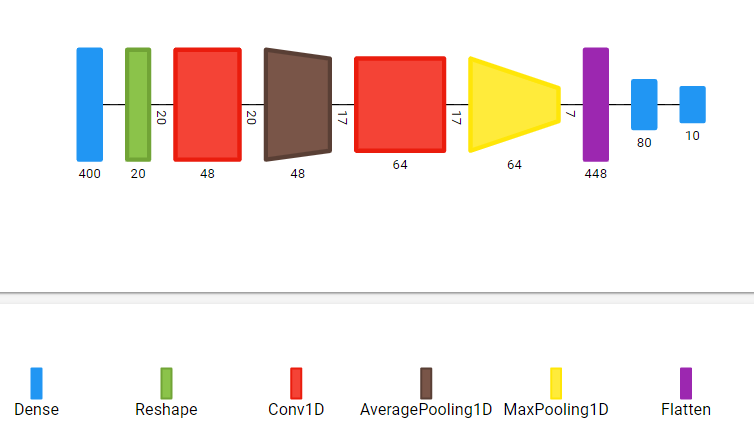

# Results and Discussion

In [ ]:
res={'Dummy Classifier': [0.3,0.16,0.0],
     'Linear SVM classifier':[0.32,0.3,0.26],
     'Radial Basis Function SVM classifier':[0.5,0.51,0.41],
     'Random Forest Classifier':[0.54,0.55,0.46],
     'Extra Trees Classifier':[0.56,0.57,0.48],
     'AdaBoost Classifier':[0.57,0.57,0.47],
     'XGBoost Classifier':[0.63,0.63,0.55],
     'Soft Voting Classifier':[0.62,0.62,0.54],
     'MLP (1 hidden layer)':[0.51,0.52,0.42],
     'MLP (more hidden layers)':[0.54,0.54,0.44],
     'MLP (polynomial features)':[0.59,0.59,0.5],
     'Convolutional Neural Network':[0.53,0.53,0.43] 
}
tab=pd.DataFrame.from_dict(res, orient='index', columns=["Accuracy","F1-weighted score","Matthews Correlation Coefficient"])

In [ ]:
tab

,Accuracy,F1-weighted score,Matthews Correlation Coefficient
Dummy Classifier,0.30,0.16,0.00
Linear SVM classifier,0.32,0.30,0.26
Radial Basis Function SVM classifier,0.50,0.51,0.41
Random Forest Classifier,0.54,0.55,0.46
Extra Trees Classifier,0.56,0.57,0.48
AdaBoost Classifier,0.57,0.57,0.47
XGBoost Classifier,0.63,0.63,0.55
Soft Voting Classifier,0.62,0.62,0.54
MLP (1 hidden layer),0.51,0.52,0.42
MLP (more hidden layers),0.54,0.54,0.44


All the tested model were able to improve the baseline metrics :
> Accuracy: **0.3** / F1-weighted score : **0.16** / Matthews Correlation Coefficient: **0**

With XGBoost being the top-performing model :

> Accuracy: **0.63** / F1-weighted score : **0.63** / Matthews Correlation Coefficient: **0.55**

 However, even the top-performing model retrieved here is probably not sufficient to solve real-life problems of rapid identification of antibiotic-resistant bacteria. 
 
Possible slight improvements can arise from a more exaustive Grid/Random Search (just a fraction of the paramaters has undergone optimization, moreover, the architecture of the last 2 networks was chosen arbitrarily due to running time issues) and the testing of additional different models; however major improvements might be observed after a further data collection step. In particular, being in a condition of strong class imbalance, the collection of data belonging to the under-represented classes could be one of the best ways to improve the results obtained so far.

### Additional check (accuracy)

Verifying consistency between sklearn accuracy and tf.keras accuracy

In [ ]:
  cnn= keras.Sequential()
  cnn= keras.Sequential()
  cnn.add(layers.Dense(400, input_shape=(17,)))
  cnn.add(layers.Reshape((20,20)))
  cnn.add(layers.Conv1D(filters=48,kernel_size=3,strides=1,padding="same"))
  cnn.add(layers.AveragePooling1D(4,strides=1))
  cnn.add(layers.Conv1D(filters=64,kernel_size=2,strides=1,padding="same"))
  cnn.add(layers.MaxPooling1D(4,strides=2))
  cnn.add(layers.Flatten())
  cnn.add(layers.Dense(80))
  cnn.add(layers.Dense(10,activation="softmax"))

  cnn.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

  early_stopping=EarlyStopping(monitor="val_loss",mode="min",min_delta=0.03,patience=50,restore_best_weights=True,verbose=1)
cnn.fit(
    X_train_scaled,Y_train,
        epochs=400,
        validation_split=0.20,
        batch_size=200,
        callbacks=[early_stopping]
)

Epoch 1/400
53/53 [==============================] - 5s 72ms/step - loss: 1.7974 - accuracy: 0.3608 - val_loss: 2.3476 - val_accuracy: 0.0722
Epoch 2/400
53/53 [==============================] - 2s 30ms/step - loss: 1.4851 - accuracy: 0.4741 - val_loss: 2.0509 - val_accuracy: 0.2526
Epoch 3/400
53/53 [==============================] - 2s 41ms/step - loss: 1.3742 - accuracy: 0.5082 - val_loss: 1.7862 - val_accuracy: 0.3787
Epoch 4/400
53/53 [==============================] - 3s 47ms/step - loss: 1.3033 - accuracy: 0.5399 - val_loss: 2.0993 - val_accuracy: 0.2446
Epoch 5/400
53/53 [==============================] - 3s 49ms/step - loss: 1.2442 - accuracy: 0.5570 - val_loss: 1.9038 - val_accuracy: 0.3252
Epoch 6/400
53/53 [==============================] - 2s 45ms/step - loss: 1.2002 - accuracy: 0.5793 - val_loss: 1.8408 - val_accuracy: 0.3519
Epoch 7/400
53/53 [==============================] - 2s 44ms/step - loss: 1.1676 - accuracy: 0.5951 - val_loss: 1.8690 - val_accuracy: 0.3420
Epoch 

In [ ]:
Y_pred=np.argmax(cnn.predict(X_test_scaled),axis=1)

In [ ]:
#Sklearn accuracy

accuracy_score(Y_test,Y_pred)

0.5312820512820513

In [ ]:
# tf.keras accuracy

results = cnn.evaluate(X_test_scaled, Y_test)
print("test acc:", results[1])

31/31 [==============================] - 0s 5ms/step - loss: 3.3695 - accuracy: 0.5313
test acc: 0.5312820672988892
